In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
from networkx.algorithms import bipartite as bi
%matplotlib inline

The data is from paper for Bipartite networks http://danlarremore.com/bipartiteSBM
The actual data file is downloaded from http://danlarremore.com/bipartiteSBM/malariaData.zip
The data include two type of nodes namely genes and sub substring and the malaria.edgelist data set has all the edges between nodes
The genes csv contain all the genes nodes　


In [14]:
# Create Graph with all edges
data = "C:/Users/andre/Downloads/malariaData/malariaData/malaria.edgelist"
node = "C:/Users/andre/Downloads/malariaData/malariaData/genes.csv"
G = nx.Graph()
G = nx.read_weighted_edgelist(data, delimiter="\t", comments="%")

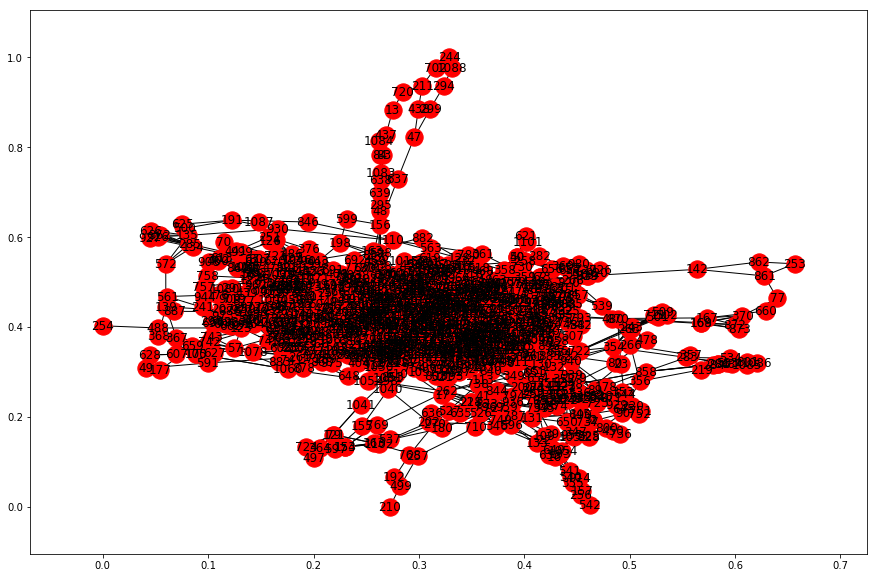

In [25]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G)
plt.show()

The graph is very massy right now. In order to analyze it, I need to use island method to reduce the graph. 
But before that I need to convert 2 node network to single node network

The genes and substring nodes are both numbers, so I need to use the gense csv to create a list include a genes nodes before projectng the graph

In [20]:
# create node list
glist = []
with open(node, 'rt',encoding='utf8') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        glist.append(row)
glist = [item for sublist in glist for item in sublist]
        

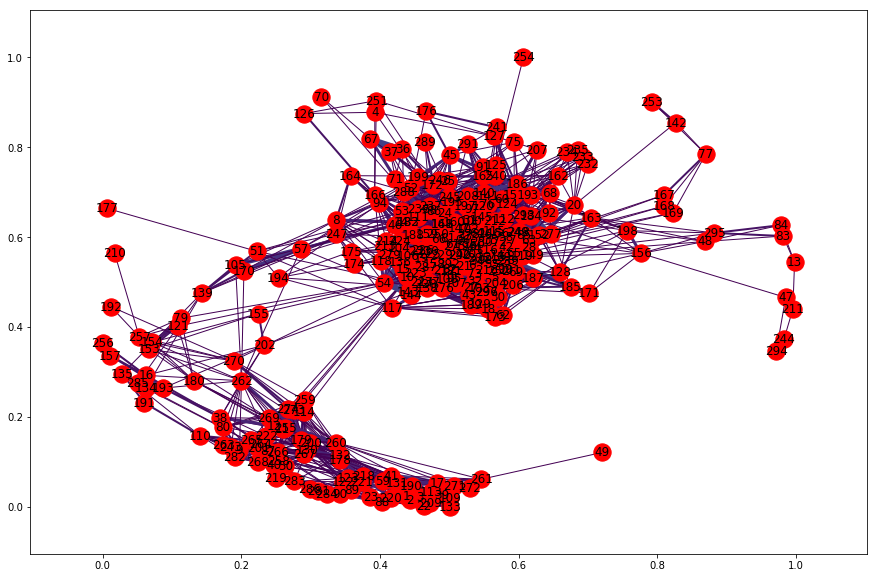

In [27]:
# project network on genes node 
B = bi.weighted_projected_graph(G, glist, ratio=False)
weights = [edata['weight'] for f,t,edata in B.edges(data=True)]
plt.figure(figsize = (15,10))
nx.draw_networkx(B, width=weights, edge_color=weights)

The graph is redueced after projection and there seems to have two big groups

To further reduced the network, we will use island method. The first thing we need to implement for the island method is a function to virtually raise the water level. The function below takes a graph, and applies a threshold (“water level”), letting all edges above a certain value through, and removing all others.

In [37]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

Then we define how the water level should be raised. Compute evenly spaced thresholds and produce a list of networks at each water level:

In [30]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [33]:
islands = island_method(B)
for i in islands:
    print(i[0], len(i[1]))

1 279
5 135
9 61
13 23
17 8
21 2


From the output we see that when all links with a value of 1 are dropped, the network separates into 279 island
and the number of islands keep reduced when water level raise

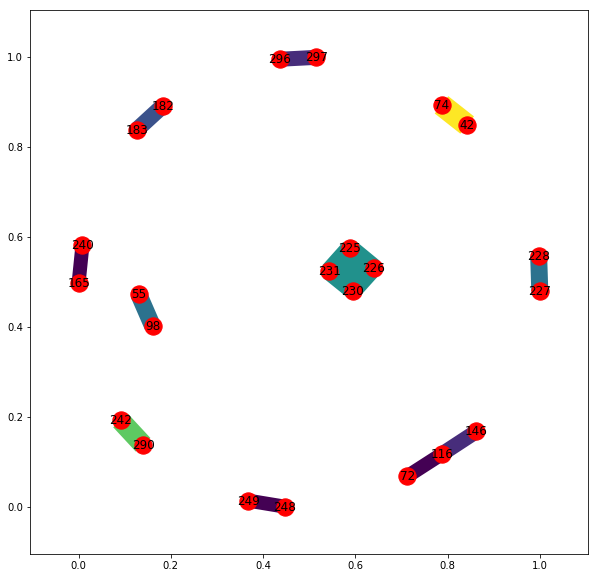

In [41]:
B2 = trim_edges(B, 13)
plt.figure(figsize = (10,10))
weights = [edata['weight'] for f,t,edata in B2.edges(data=True)]
nx.draw_networkx(B2, width=weights, edge_color=weights)

From the graph we see most groups are connected pairs and there is one open triad. The group in the center has very strong ties where all nodes are connected to each other

[('242', '290', {'weight': 20}),
 ('74', '42', {'weight': 22}),
 ('225', '226', {'weight': 18}),
 ('225', '231', {'weight': 18}),
 ('225', '230', {'weight': 18}),
 ('226', '231', {'weight': 18}),
 ('226', '230', {'weight': 18}),
 ('231', '230', {'weight': 18})]

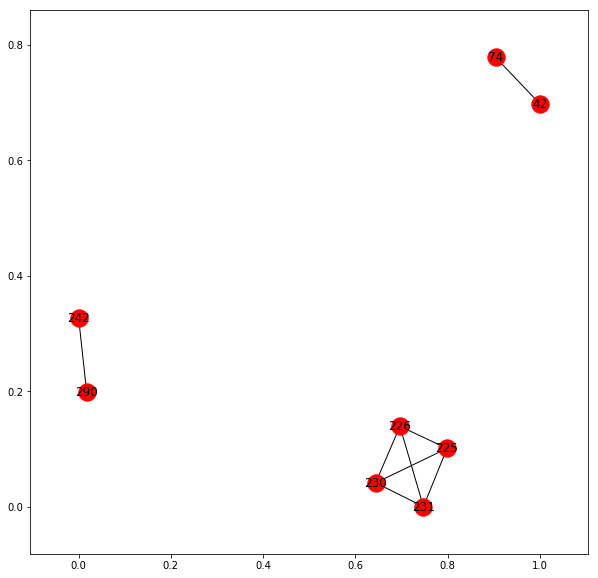

In [40]:
B3 = trim_edges(B, 17)
plt.figure(figsize = (10,10))
weights = [edata['weight'] for f,t,edata in B3.edges(data=True)]
nx.draw_networkx(B3)
B3.edges(data=True)

After raise the water level to 17 there are three group left, the group with four genes shared 18 substrings with each other. So we can guess that
they share the same 18 substrings which means the four genes are the same type